# Problem Statement

Cars Dataset

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

## 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [2]:
Cars_data = pd.read_csv("cars-dataset.csv")
Cars_data.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
351,ford escort 4w,4,98.0,65,2045,16.2,81,34.4
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
66,amc ambassador sst,8,304.0,150,3672,11.5,72,17.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
184,capri ii,4,140.0,92,2572,14.9,76,25.0
246,mazda glc deluxe,4,78.0,52,1985,19.4,78,32.8
221,chevrolet caprice classic,8,305.0,145,3880,12.5,77,17.5
96,amc ambassador brougham,8,360.0,175,3821,11.0,73,13.0
188,dodge coronet brougham,8,318.0,150,4190,13.0,76,16.0
242,bmw 320i,4,121.0,110,2600,12.8,77,21.5


In [3]:
Cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
Cars_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


## Observations:
### horsepower(hp) feature is missing in the describe output. horsepower feature should have numeric values, but here the the datatype is object. Some issues/errors might be there in the data which needs to be rectified.

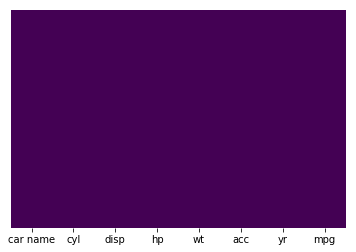

In [5]:
sns.heatmap(Cars_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Get the records where the horsepower is not numeric
Cars_data[Cars_data.hp.str.isdigit() == False]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [7]:
Cars_data = Cars_data.replace('?', np.nan)
Cars_data['hp'] = Cars_data['hp'].astype('float64')
Cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [8]:
# Treating missing values in horsepower with median
print ("Before missing value treatment: ")
print (Cars_data.isna().sum())
print ("=======================================")
Cars_data = Cars_data.fillna(Cars_data.median())
print ("After missing value treatment: ")
print (Cars_data.isna().sum())

Before missing value treatment: 
car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64
After missing value treatment: 
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [9]:
# Dropping the car name column as it is not required for our analysis.
Cars_data.drop(['car name'], axis=1, inplace=True)

# Observations:
### There is no null values.
### As the hp feature had "?" as value, the datatype of it is taken as object. Now we have identified and replaced it with median value. Now the incorrect value is treated and data is ready for anlysis.

## 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

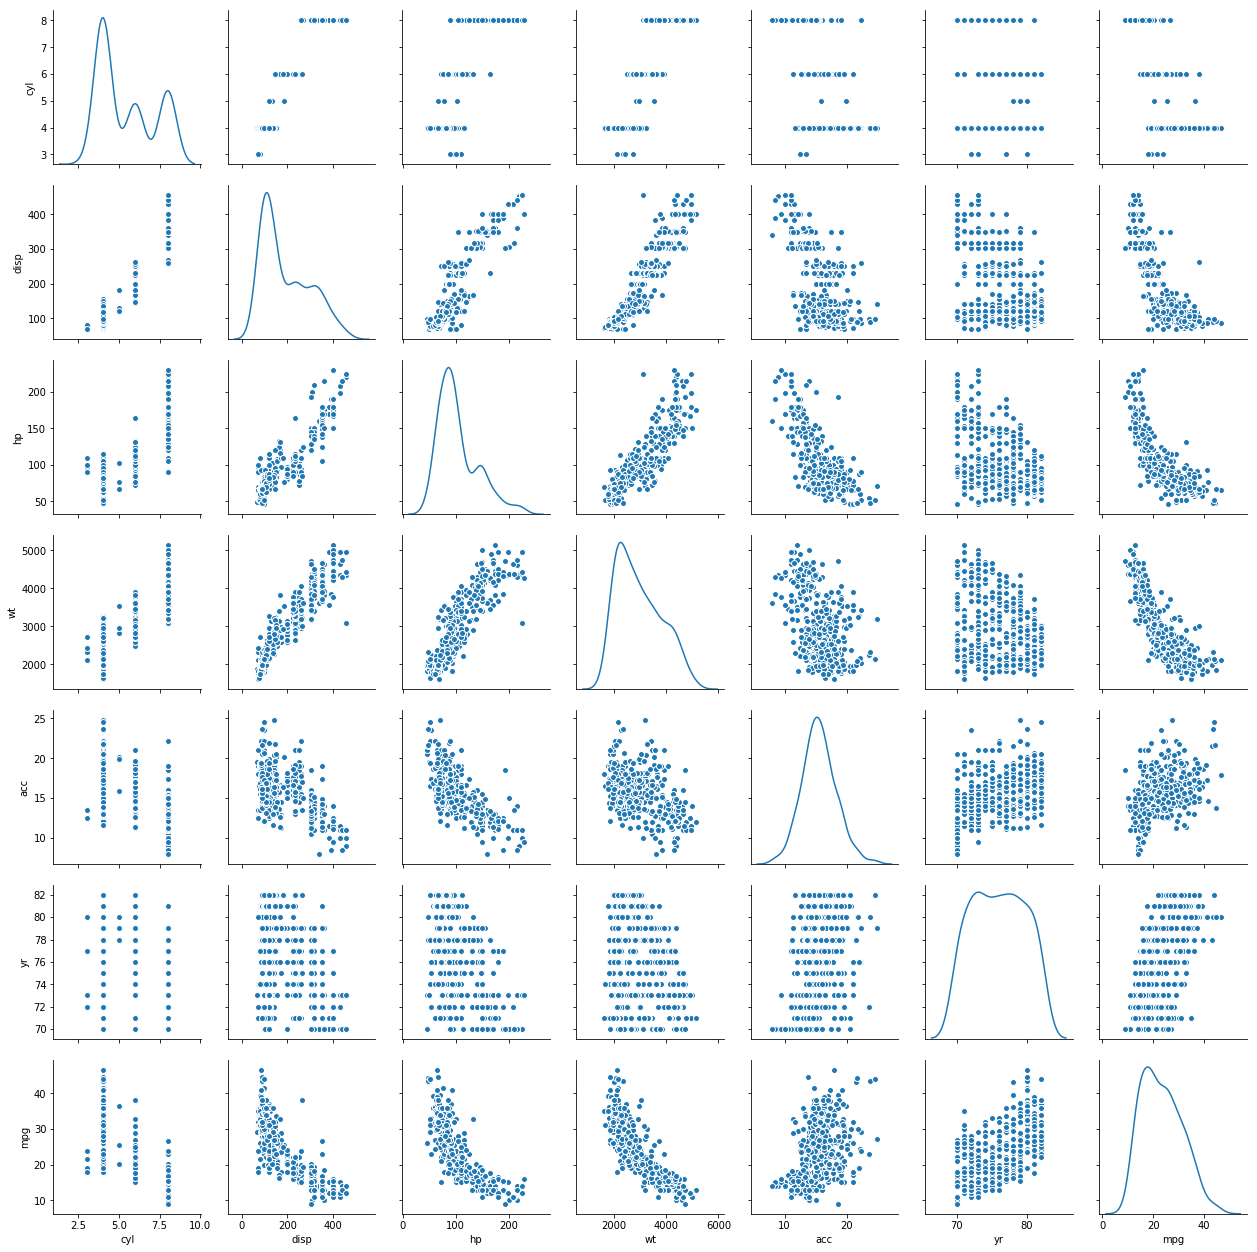

In [10]:
sns.pairplot(Cars_data, diag_kind='kde')

## Observations:
### From the diagonal Kde it is evident that, there is atleast 2 or 3 good clusters in the data.
### With the scattor plot we can infer the below relationship between features.
### --> There is strong positive linear relationship between Displacement and Weight , Displacement and Horsepower, Horsepower and weight.
### --> There is weak positive linear relationship between mpg and accelaration.
### --> There is weak negative linear relationship between Displacement and accelaration, horsepower and accelaration, weight and accelaration.
### --> There is a strong negative non-linear relationship between mpg and displacement, mpg and weight, mpg and horsepower.
### --> We have max mpg for 4 cylinder vehicles.

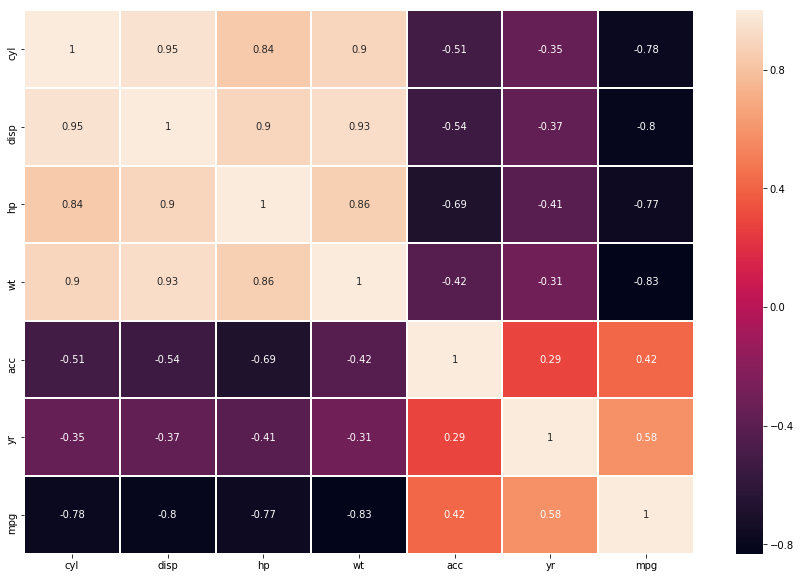

In [11]:
plt.subplots(figsize=(15,10))
sns.heatmap(Cars_data.corr(), annot=True, linewidths=1)

In [12]:
CorrMat = Cars_data.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == -1]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with mpg.')
    else:
        print ("There is no significant correlation between mpg and the following attributes: ", indices)

All the attributes have some corrrelation between them.


In [13]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 6]
print ("There is significant positive correlation between mpg and the following attributes: ", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('cyl', 'disp'), ('cyl', 'hp'), ('cyl', 'wt'), ('disp', 'hp'), ('disp', 'wt'), ('hp', 'wt'), ('acc', 'yr'), ('acc', 'mpg'), ('yr', 'mpg')]
There is significant positive correlation between mpg and the following attributes:  ['acc', 'yr']


In [14]:
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant negative correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 6]

if len(indices) == 0:
    print ("Personal Loan do not have negative correlation with any attributes.")
else:
    print ("There is significant negative correlation between mpg and the following attributes: ", indices)


There is significant negative correlation between the following attributes: 
------------------------------------------------------------------------
[('cyl', 'acc'), ('cyl', 'yr'), ('cyl', 'mpg'), ('disp', 'acc'), ('disp', 'yr'), ('disp', 'mpg'), ('hp', 'acc'), ('hp', 'yr'), ('hp', 'mpg'), ('wt', 'acc'), ('wt', 'yr'), ('wt', 'mpg')]
There is significant negative correlation between mpg and the following attributes:  ['cyl', 'disp', 'hp', 'wt']


## Observations:
### Have listed the correlation between attributes in the above outputs.
### mpg seams to have some correlation with all the features.

## Featuring and Standardization

In [15]:
# Year would be more effective if we can transorm this to calculate age of vehicle. 
# This dataset was used in 1983 so we would subtract year from 83 to get the age
Cars_data['Car_Age'] = 83 - Cars_data['yr']

Cars_data.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,Car_Age
113,6,155.0,107.0,2472,14.0,73,21.0,10
76,4,121.0,112.0,2933,14.5,72,18.0,11
202,6,258.0,95.0,3193,17.8,76,17.5,7
162,6,258.0,110.0,3730,19.0,75,15.0,8
322,4,86.0,65.0,2110,17.9,80,46.6,3
285,8,305.0,130.0,3840,15.4,79,17.0,4
11,8,340.0,160.0,3609,8.0,70,14.0,13
101,6,198.0,95.0,2904,16.0,73,23.0,10
52,4,88.0,76.0,2065,14.5,71,30.0,12
106,8,350.0,180.0,4499,12.5,73,12.0,10


In [16]:
from scipy.stats import zscore

# Standardizing with zscore excluding yr
Cars_data_z = Cars_data.drop(columns='yr')
Cars_data_z = Cars_data_z.apply(zscore)

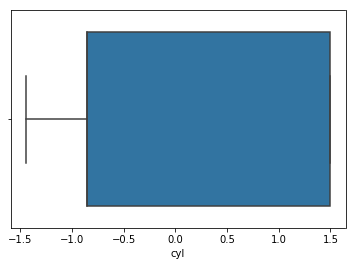

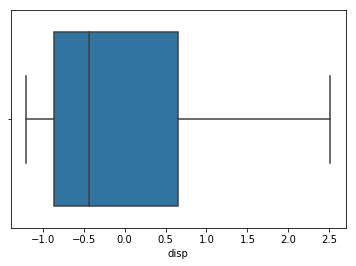

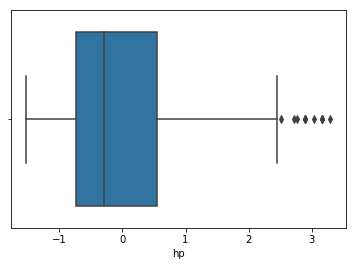

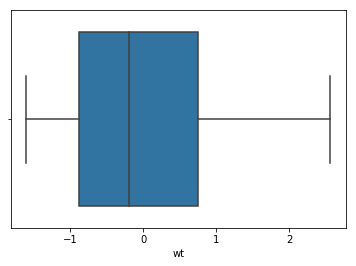

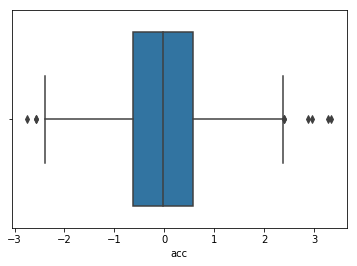

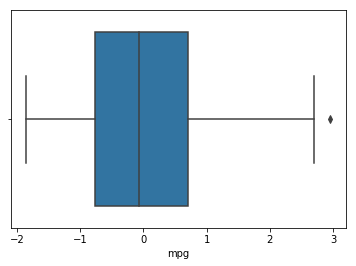

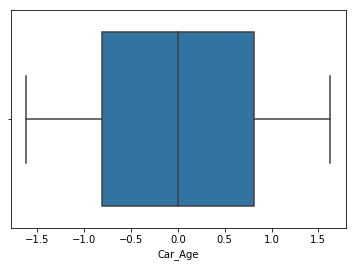

In [17]:
# Let us check for outliers now
#Cars_data_z.boxplot()

for i, col in enumerate(Cars_data_z):
    plt.figure(i)
    sns.boxplot(Cars_data_z[col])

## Observations:
### There are more outliers in horsepower and accelaration.
### As we have atleast 2 or 3 good clusters, let us treat the outliers with median after seperating the clusters.

## 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

### Info:
### As from the KDE pair plot it is evident that there are atleast 2 or 3 clusters, lets find out the optimal number of clusters between 2 to 8.

In [18]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 8, random_state=1)
  clusters.fit(Cars_data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1294.841895
1,3,946.019791
2,4,738.393224
3,5,664.952813
4,6,598.650742
5,7,543.182599


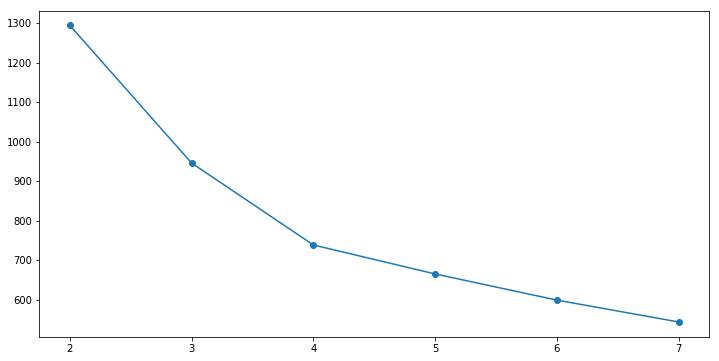

In [19]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Observations:
### From the above elbow plot it is evident that there are 4 good clusters.

In [20]:
# Seperating the clusters.
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(Cars_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [25]:
# Getting the number of values in each cluster.
from collections import Counter, defaultdict
print (Counter(cluster.labels_))

Counter({1: 111, 3: 102, 2: 94, 0: 91})


In [26]:
# Getting the centroids of the clusters.
centroids = cluster.cluster_centers_
centroids

array([[ 0.42443037,  0.30530323, -0.03775766,  0.33776539,  0.29367006,
        -0.49682681, -0.03298635],
       [-0.82450284, -0.78042723, -0.74238037, -0.76525521,  0.38447752,
         1.19411648, -1.12432606],
       [ 1.49819126,  1.50392292,  1.52168282,  1.40409797, -1.0861486 ,
        -1.16379715,  0.68832385],
       [-0.86209143, -0.80905811, -0.56076487, -0.76253463,  0.32055871,
         0.21628669,  0.61862263]])

In [27]:
centroid_df = pd.DataFrame(centroids, columns = list(Cars_data_z) )
prediction=cluster.predict(Cars_data_z)
Cars_data_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
Cars_data_z.sample(10)

,cyl,disp,hp,wt,acc,mpg,Car_Age,GROUP
219,-0.856321,-0.685872,-0.217527,-0.792673,-0.024722,0.254341,-0.268063,3
248,-0.856321,-0.983552,-1.160564,-1.383845,0.302049,1.612243,-0.538847,1
205,-0.856321,-0.925936,-0.767632,-0.964113,0.302049,0.574601,0.002721,3
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.090751,1.627426,2
110,-0.856321,-0.820308,-0.269918,-0.699268,0.338357,-0.194023,0.815074,3
200,0.320935,0.543257,-0.689046,0.713634,1.972212,-0.706439,0.002721,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,0.190289,1.627426,3
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,1.627426,2
202,0.320935,0.620078,-0.243723,0.263161,0.810359,-0.770491,0.002721,0
384,-0.856321,-0.983552,-0.977195,-1.188758,0.047894,1.087017,-1.621983,1


### Now that we have done the below...
### --> seperated the clusters and got the counts in each clusters.
### --> Got the centroids of each cluster.
### --> Given the cluster ID for each row of the dataframe.
### Now moving on to visualize the clusters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234CA68B860>,
      dtype=object)

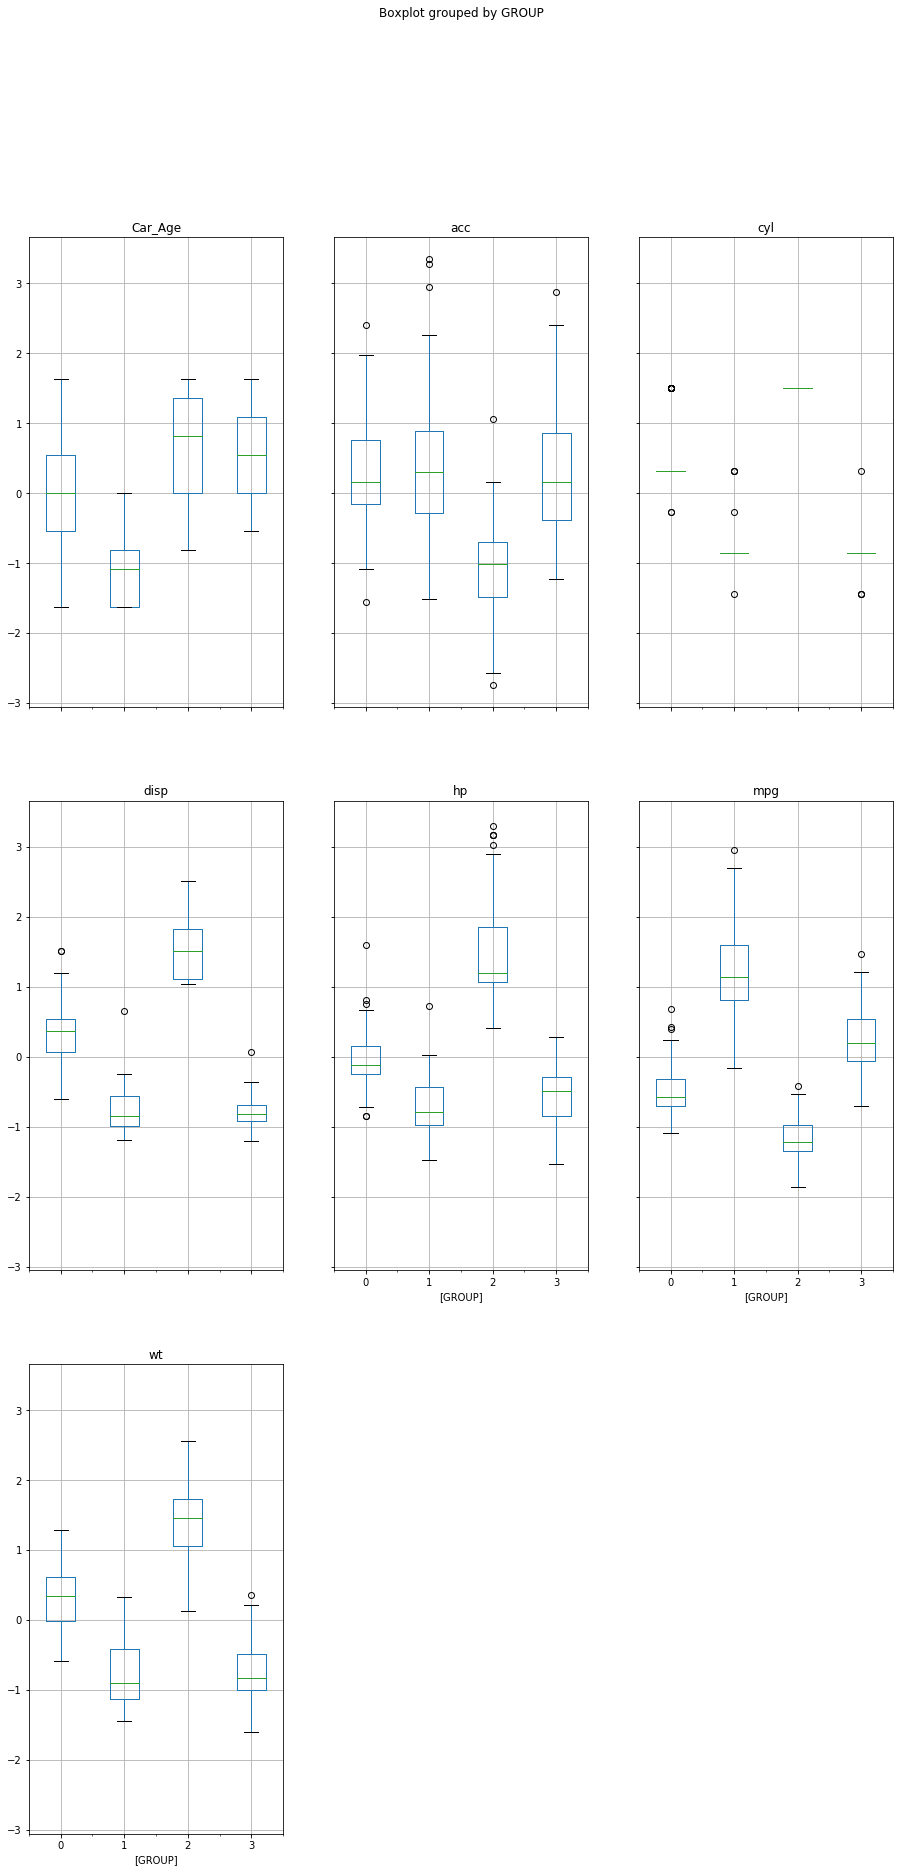

In [28]:
Cars_data_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

## Observations:
### There are outliers in horsepower, accelaration, displacement, mpg
### Lets treat the outliers with median

In [29]:
# Addressing outliers at group level

data = Cars_data_z

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Cars_data_z['GROUP']))

C:\Users\Iyyappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234CD3FA518>,
      dtype=object)

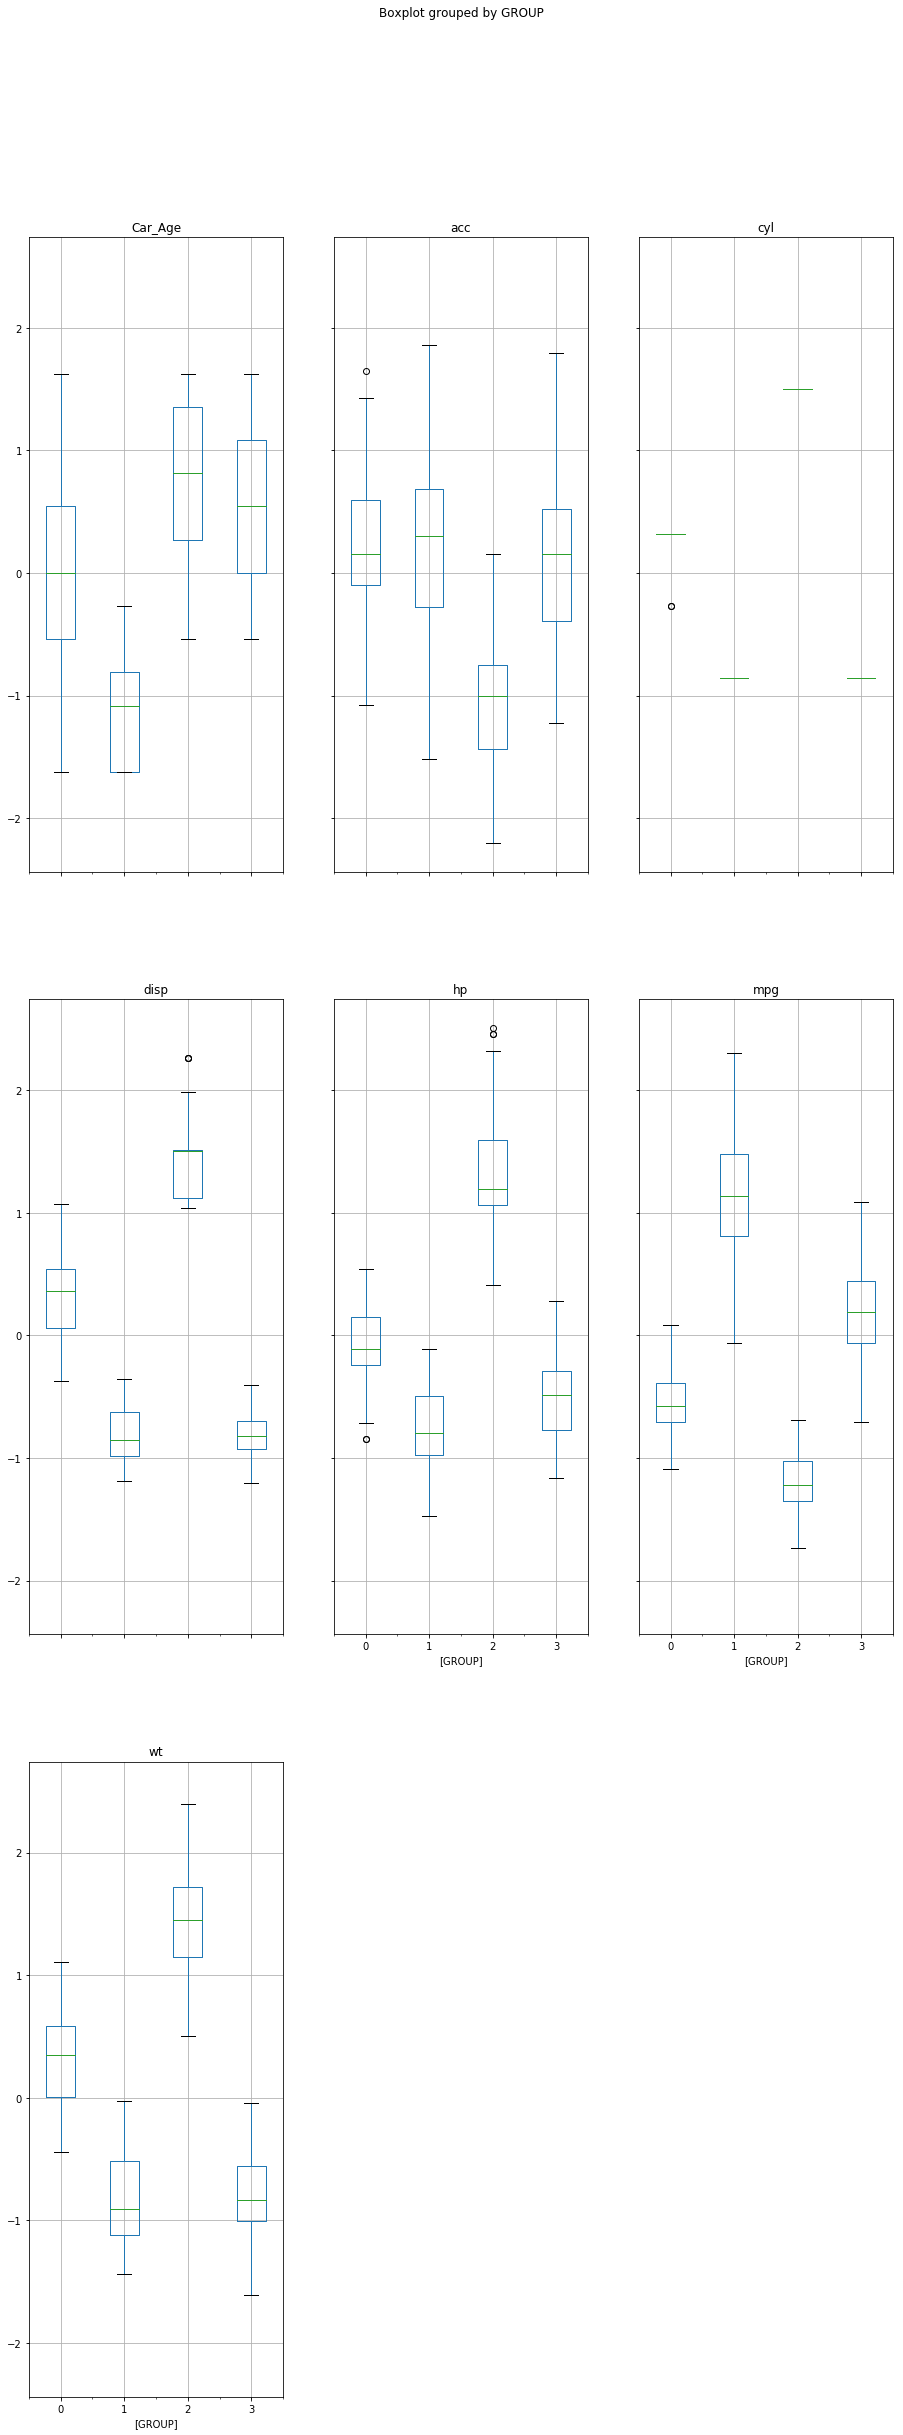

In [30]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 40))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.

In [31]:
df_GBSplit = Cars_data_z.groupby('GROUP')
#[df_GBSplit.get_group(x) for x in df_GBSplit.groups]

Group = []
Shape = []
for x in df_GBSplit.groups:
    Group.append(x)
    Shape.append(df_GBSplit.get_group(x).shape)

GroupDetails_df = pd.DataFrame( { "Group":Group, "Shape": Shape} )
GroupDetails_df

,Group,Shape
0,0,"(91, 8)"
1,1,"(111, 8)"
2,2,"(94, 8)"
3,3,"(102, 8)"


## 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

C:\Users\Iyyappan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Iyyappan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Iyyappan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Iyyappan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


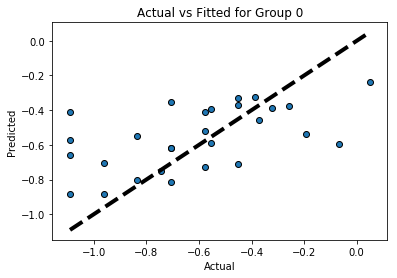

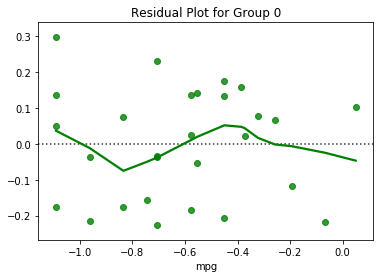

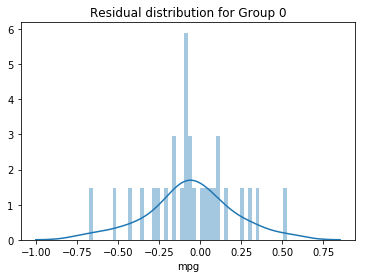

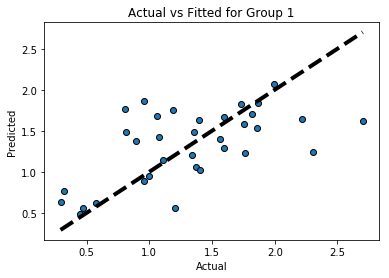

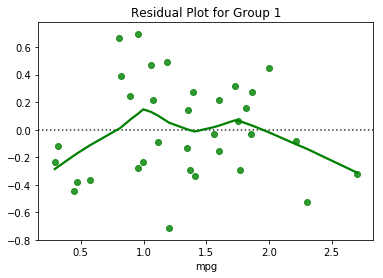

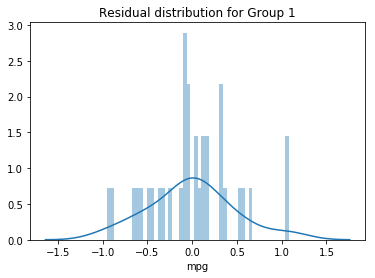

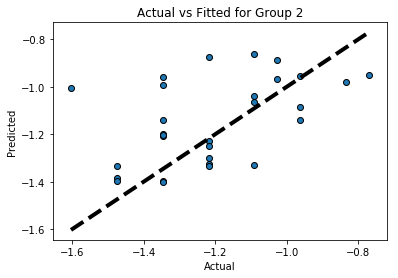

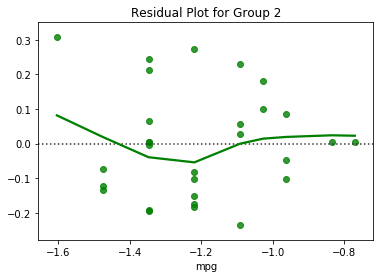

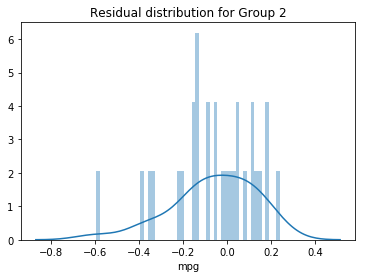

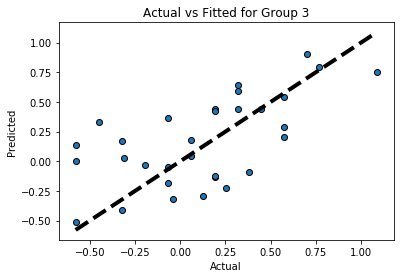

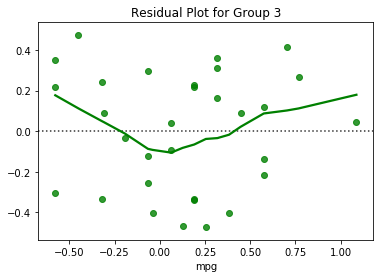

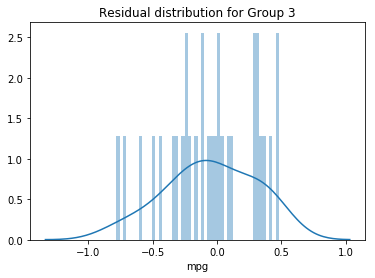

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Group = []
Coeff = []
Intercept = []
#Train_Accuracy = []
#Test_Accuracy = []
RSquared = []
RMSE = []
i = 0

for x in df_GBSplit.groups:
    df = df_GBSplit.get_group(x)
    X = df.drop(['mpg','GROUP'], axis=1)
    Y = df['mpg']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
    predictions = lm.predict(X_test)
    Group.append(x)
    Coeff.append(lm.coef_)
    Intercept.append(lm.intercept_)
    #Train_Accuracy.append(lm.score(X_train,Y_train))
    #Test_Accuracy.append(lm.score(X_test,Y_test))
    RSquared.append(metrics.r2_score(Y_test,predictions))
    RMSE.append(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

    plt.figure(i)
    plt.scatter(Y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    plt.title('Actual vs Fitted for Group ' + str(x))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    i = i + 1

    plt.figure(i)
    plt.title('Residual Plot for Group ' + str(x))
    sns.residplot(Y_test, predictions, lowess=True, color="g")
    i = i + 1

    plt.figure(i)
    plt.title('Residual distribution for Group ' + str(x))
    sns.distplot((Y_test-predictions),bins=50);
    i = i + 1

In [33]:
Coeff_df = pd.DataFrame(Coeff, columns = X_train.columns)
Coeff_df.columns = [str(col) + '_Coeff' for col in Coeff_df.columns]
Group_df = pd.DataFrame( { "Group":Group } )
Intercept_df = pd.DataFrame( { "Intercept":Intercept } )
#Train_Accuracy_df = pd.DataFrame( { "Train_Accuracy":Train_Accuracy } )
#Test_Accuracy_df = pd.DataFrame( { "Test_Accuracy":Test_Accuracy })
RSquared_df = pd.DataFrame( { "RSquared":RSquared })
RMSE_df = pd.DataFrame( { "RMSE":RMSE })

Coeff_df['Intercept'] = Intercept_df['Intercept'].values
#Coeff_df['Train_Accuracy'] = Train_Accuracy_df['Train_Accuracy'].values
#Coeff_df['Test_Accuracy'] = Test_Accuracy_df['Test_Accuracy'].values
Coeff_df['RSquared'] = RSquared_df['RSquared'].values
Coeff_df['RMSE'] = RMSE_df['RMSE'].values
Coeff_df['GROUP'] = Group_df['Group'].values
Cols = Coeff_df.columns.tolist()
Cols = Cols[-1:] + Cols[:-1]
#Coeff_df = pd.concat([Group_df, Train_Accuracy_df, Test_Accuracy_df, Intercept_df, Coeff_df])
Coeff_df = Coeff_df[Cols]
Coeff_df

,GROUP,cyl_Coeff,disp_Coeff,hp_Coeff,wt_Coeff,acc_Coeff,Car_Age_Coeff,Intercept,RSquared,RMSE
0,0,0.180117,-0.018292,-0.194280,-0.426187,-0.045260,-0.211123,-0.406280,0.260717,0.263562
1,1,0.989142,0.119402,-0.310337,-1.073160,0.173369,-0.287844,0.662633,0.324761,0.469773
2,2,0.000000,-0.128081,-0.078494,-0.134194,-0.208922,-0.193679,-0.737416,-0.006129,0.200397
3,3,0.730143,-0.725546,-0.047943,-0.663784,0.002044,-0.110440,-0.190826,0.302482,0.343450


## Observation:
### The points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data.
### Residuals are normally distributed.
### Lower values of RMSE indicates better fit.